In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import normalize, to_categorical
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
(trainX, trainY), (testX, testY) = mnist.load_data()

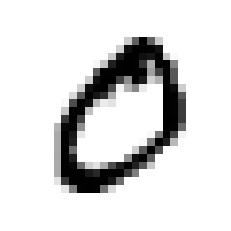

In [10]:
some_digit = trainX[1]
plt.imshow(some_digit, cmap=plt.cm.binary)
plt.axis("off")
plt.show()

In [11]:
trainy[1]

0

In [13]:
### independent datas are normalized using keyword normalize
trainX = normalize(trainX)
testX = normalize(testX)

In [14]:
### depenent datas are categorised using keyword to_categorical
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [15]:
### Deep Learning without DROPOUT 

In [16]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
## inputs
model.add(Dense(784, activation="relu"))
## output layer
model.add(Dense(10, activation="softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
history = model.fit(trainX, trainY, validation_split = 0.2, epochs = 10, batch_size = 50)


Epoch 1/10
960/960 [==============================] - 7s 8ms/step - loss: 0.2672 - accuracy: 0.9221 - val_loss: 0.1318 - val_accuracy: 0.9613
Epoch 2/10
960/960 [==============================] - 7s 8ms/step - loss: 0.1049 - accuracy: 0.9681 - val_loss: 0.0961 - val_accuracy: 0.9700
Epoch 3/10
960/960 [==============================] - 7s 8ms/step - loss: 0.0664 - accuracy: 0.9794 - val_loss: 0.0818 - val_accuracy: 0.9747
Epoch 4/10
960/960 [==============================] - 7s 8ms/step - loss: 0.0474 - accuracy: 0.9854 - val_loss: 0.0770 - val_accuracy: 0.9769
Epoch 5/10
960/960 [==============================] - 7s 7ms/step - loss: 0.0337 - accuracy: 0.9897 - val_loss: 0.0829 - val_accuracy: 0.9745
Epoch 6/10
960/960 [==============================] - 7s 7ms/step - loss: 0.0230 - accuracy: 0.9934 - val_loss: 0.0884 - val_accuracy: 0.9740
Epoch 7/10
960/960 [==============================] - 7s 7ms/step - loss: 0.0182 - accuracy: 0.9946 - val_loss: 0.0827 - val_accuracy: 0.9772
Epoch 

In [17]:
history.history

{'accuracy': [0.9220625162124634,
  0.9681249856948853,
  0.9794166684150696,
  0.9854166507720947,
  0.9896875023841858,
  0.9934375286102295,
  0.9945625066757202,
  0.9959999918937683,
  0.996791660785675,
  0.9968958497047424],
 'loss': [0.26719117164611816,
  0.10492683947086334,
  0.06639223545789719,
  0.047375310212373734,
  0.03369620069861412,
  0.0229696836322546,
  0.01815764792263508,
  0.014022629708051682,
  0.011271696537733078,
  0.009656279347836971],
 'val_accuracy': [0.9612500071525574,
  0.9700000286102295,
  0.9746666550636292,
  0.9769166707992554,
  0.9745000004768372,
  0.9739999771118164,
  0.9771666526794434,
  0.9770833253860474,
  0.9775833487510681,
  0.9782500267028809],
 'val_loss': [0.1318257451057434,
  0.09608641266822815,
  0.08180377632379532,
  0.0769786611199379,
  0.08294196426868439,
  0.08835674822330475,
  0.08272266387939453,
  0.0853123590350151,
  0.08692968636751175,
  0.09401567280292511]}

In [18]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

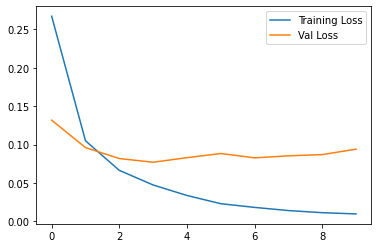

In [19]:
plt.plot(loss, label = "Training Loss")
plt.plot(val_loss, label = "Val Loss")
plt.legend()
plt.show()

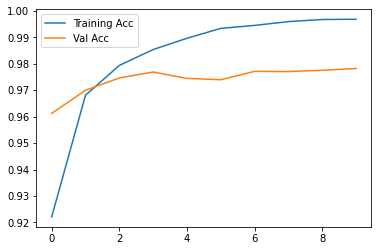

In [20]:
plt.plot(accuracy, label = "Training Acc")
plt.plot(val_accuracy, label = "Val Acc")
plt.legend()
plt.show()

In [21]:
### Deep Learning with DROPOUT

In [22]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(784, activation = "relu"))
### 50% of the nuerons are used
model.add(Dropout(0.5))
model.add(Dense(130, activation = "relu"))
### further 50% of the remaining 50% nuerons are used
model.add(Dropout(0.5))
## Out Put Layer
model.add(Dense(10, activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
history = model.fit(trainX, trainY, epochs = 10, validation_split = 0.2, batch_size = 50)

Epoch 1/10
960/960 [==============================] - 9s 9ms/step - loss: 0.4011 - accuracy: 0.8769 - val_loss: 0.1436 - val_accuracy: 0.9562
Epoch 2/10
960/960 [==============================] - 9s 9ms/step - loss: 0.1878 - accuracy: 0.9448 - val_loss: 0.1116 - val_accuracy: 0.9657
Epoch 3/10
960/960 [==============================] - 9s 9ms/step - loss: 0.1497 - accuracy: 0.9566 - val_loss: 0.1028 - val_accuracy: 0.9693
Epoch 4/10
960/960 [==============================] - 9s 9ms/step - loss: 0.1244 - accuracy: 0.9620 - val_loss: 0.0897 - val_accuracy: 0.9735
Epoch 5/10
960/960 [==============================] - 9s 9ms/step - loss: 0.1106 - accuracy: 0.9668 - val_loss: 0.0829 - val_accuracy: 0.9755
Epoch 6/10
960/960 [==============================] - 9s 9ms/step - loss: 0.1030 - accuracy: 0.9693 - val_loss: 0.0820 - val_accuracy: 0.9750
Epoch 7/10
960/960 [==============================] - 9s 9ms/step - loss: 0.0908 - accuracy: 0.9729 - val_loss: 0.0809 - val_accuracy: 0.9768
Epoch 

In [23]:
history.history

{'accuracy': [0.8769375085830688,
  0.9447500109672546,
  0.9566249847412109,
  0.9619583487510681,
  0.9667916893959045,
  0.9692916870117188,
  0.9729166626930237,
  0.9745416641235352,
  0.9743750095367432,
  0.9778541922569275],
 'loss': [0.4011240601539612,
  0.18777188658714294,
  0.14974041283130646,
  0.12439093738794327,
  0.11064892262220383,
  0.10296457260847092,
  0.09084799140691757,
  0.08412998914718628,
  0.08053799718618393,
  0.07353552430868149],
 'val_accuracy': [0.956166684627533,
  0.965749979019165,
  0.9693333506584167,
  0.9735000133514404,
  0.9754999876022339,
  0.9750000238418579,
  0.9767500162124634,
  0.9755833148956299,
  0.9768333435058594,
  0.9765833616256714],
 'val_loss': [0.14356957376003265,
  0.11157268285751343,
  0.10282852500677109,
  0.08972794562578201,
  0.08291957527399063,
  0.08200082182884216,
  0.08094596117734909,
  0.08527708798646927,
  0.0863645151257515,
  0.08339963108301163]}

In [24]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

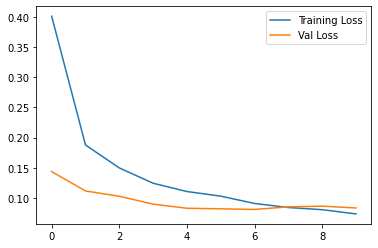

In [25]:
plt.plot(loss, label = "Training Loss")
plt.plot(val_loss, label = "Val Loss")
plt.legend()
plt.show()

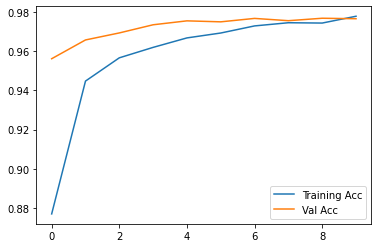

In [26]:
plt.plot(accuracy, label = "Training Acc")
plt.plot(val_accuracy, label = "Val Acc")
plt.legend()
plt.show()